# TIME SERIES ANALYSIS PROJECT - ALCOHOL SALES
GROUP MEMBERS:

ANTHEA GAMJYA - A022, TINA NARSINGHANI - A040, ARISHA AKHTAR - A041, SAMRIDDHI SHARMA - A042

Problem Statement:

This study involves Analyzing Alcohol Sales data using time series methods and models to forecast future sales accurately. By examining historical sales patterns, the goal is to provide actionable insights for stakeholders in the alcohol industry, supporting inventory management and business planning decisions based on predicted sales trends.

Dataset description:

Data is a monthly alcohol sales data from 1992 to 2019. The data doesnot have any missing or null values. The number of columns are 2 , namely Date and S4248SM144NCEN(sales) columns. The data has both trend and seasonality.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import itertools

In [ ]:
df=pd.read_csv('/content/Alcohol_Sales.csv')

In [ ]:
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [ ]:
df.shape

(325, 2)

In [ ]:
df['DATE'].head()

0    1992-01-01
1    1992-02-01
2    1992-03-01
3    1992-04-01
4    1992-05-01
Name: DATE, dtype: object

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df = df.set_index('DATE')

In [ ]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


#Checking for Missing Dates

In [ ]:
custom_freq = pd.offsets.DateOffset(months=1)
complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=custom_freq)

missing_dates = complete_date_range.difference(df.index)
if len(missing_dates) == 0:
    print("No missing dates in the time series data.")
else:
    print("Missing dates in the time series data:")
    print(missing_dates)

No missing dates in the time series data.


#Plotting the Sales Data

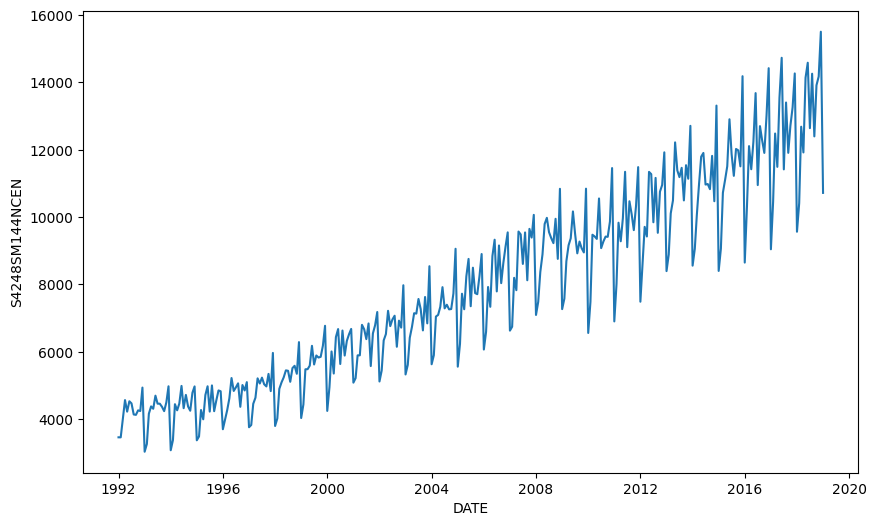

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index , df['S4248SM144NCEN'])
plt.xlabel('DATE')
plt.ylabel('S4248SM144NCEN')
plt.show()

#Seasonal Decomposition

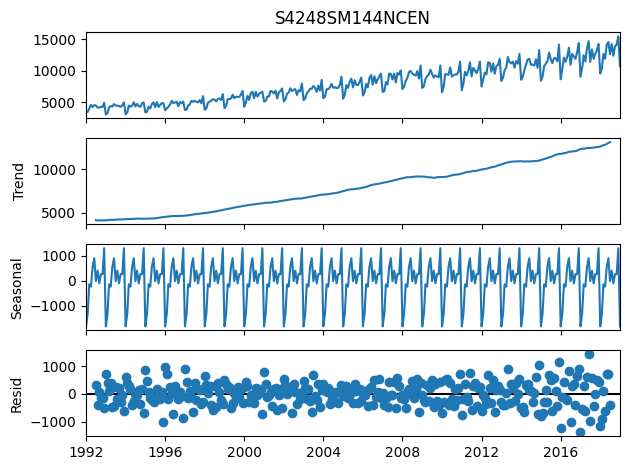

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['S4248SM144NCEN'],model='add',period=12)
result.plot()
plt.show()

#Testing for Trend and Seasonality:

In [ ]:
pip install pymannkendall

In [ ]:
import pymannkendall as mk

# Perform Mann-Kendall test
# H0: There is no monotonic trend in the series

mk.original_test(df['S4248SM144NCEN'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=21.717151020991032, Tau=0.8074453941120607, s=42512.0, var_s=3831748.0, slope=28.870927849621935, intercept=2803.9096883612465)

h: This is a boolean value indicating whether the null hypothesis is rejected or not. If h=True, it means that the null hypothesis (no trend) is rejected, indicating that there is a significant trend present in the data.

p: This is the p-value associated with the Mann-Kendall Test. It represents the probability of obtaining the observed trend (or a more extreme trend) under the assumption that the null hypothesis is true. A p-value of 0.0 suggests that the trend is highly significant

z: This is the standardized test statistic (Z-score) of the Mann-Kendall Test. It measures the number of standard deviations by which the observed trend deviates from the expected trend under the null hypothesis.

Tau: This is Kendall's Tau, which is a measure of the strength and direction of the monotonic relationship between two variables. In this context, it indicates the strength of the trend observed in the time series data. A Tau value close to 1 indicates a strong increasing trend.

s: This is the total number of concordant pairs minus the total number of discordant pairs in the data.



In [ ]:
from scipy.stats import kruskal
def seasonality_test(series,pr):
  seasonal=False
  idx=np.arange(len(series.index))% pr
  H_statistic,p_value=kruskal(series,idx)
  if p_value<=0.05:
    seasonal=True
    print("p-value ",p_value)
  return seasonal

seasonality_test(df['S4248SM144NCEN'],12)

p-value  5.872225164759111e-108


True

Here, we got p value extremely low, almost close to zero indicating that there are significant differences between the groups, supporting the existence of seasonality.

**By pymannkendall test and kruskal test we came to know that the data has both trend and seasonality present.**

#EXPONENTIAL SMOOTHING (HOLT WINTERS ADDITIVE MODEL )

In [ ]:
train_df=df[:int(df.shape[0]*0.7)]
test_df=df[int(df.shape[0]*0.7):]

splitting the data into training and testing

In [ ]:
train_df.head(5)

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
train_df.shape

(227, 1)

In [ ]:
test_df.shape

(98, 1)

##Fitting the Model:

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing , Holt

fitted_model = ExponentialSmoothing(train_df['S4248SM144NCEN'],trend='add',seasonal='add',seasonal_periods=12).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
fitted_model.params

{'smoothing_level': 0.07071176808928836,
 'smoothing_trend': 0.05458397536697779,
 'smoothing_seasonal': 0.9261931348445338,
 'damping_trend': nan,
 'initial_level': 4228.722871486458,
 'initial_trend': 7.631510456020489,
 'initial_seasons': array([-961.50809457, -790.20512964,  -92.01239789,   60.03736416,
         237.0477207 ,  453.37385364,  138.89279808,  206.94804635,
         -36.134313  ,   26.70562298,  215.62136979,  624.11288589]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
residuals = fitted_model.resid
residuals.head()

DATE
1992-01-01    184.153713
1992-02-01     -9.513381
1992-03-01   -171.338980
1992-04-01    243.082688
1992-05-01   -302.698962
dtype: float64

##Forecasting the Values

In [ ]:
test_predictions = fitted_model.forecast(len(test_df)).rename('HW Test Forecast')

In [ ]:
test_predictions.tail()

2018-09-01    11695.626755
2018-10-01    11683.467309
2018-11-01    11448.941148
2018-12-01    13351.654228
2019-01-01     9127.775996
Freq: MS, Name: HW Test Forecast, dtype: float64

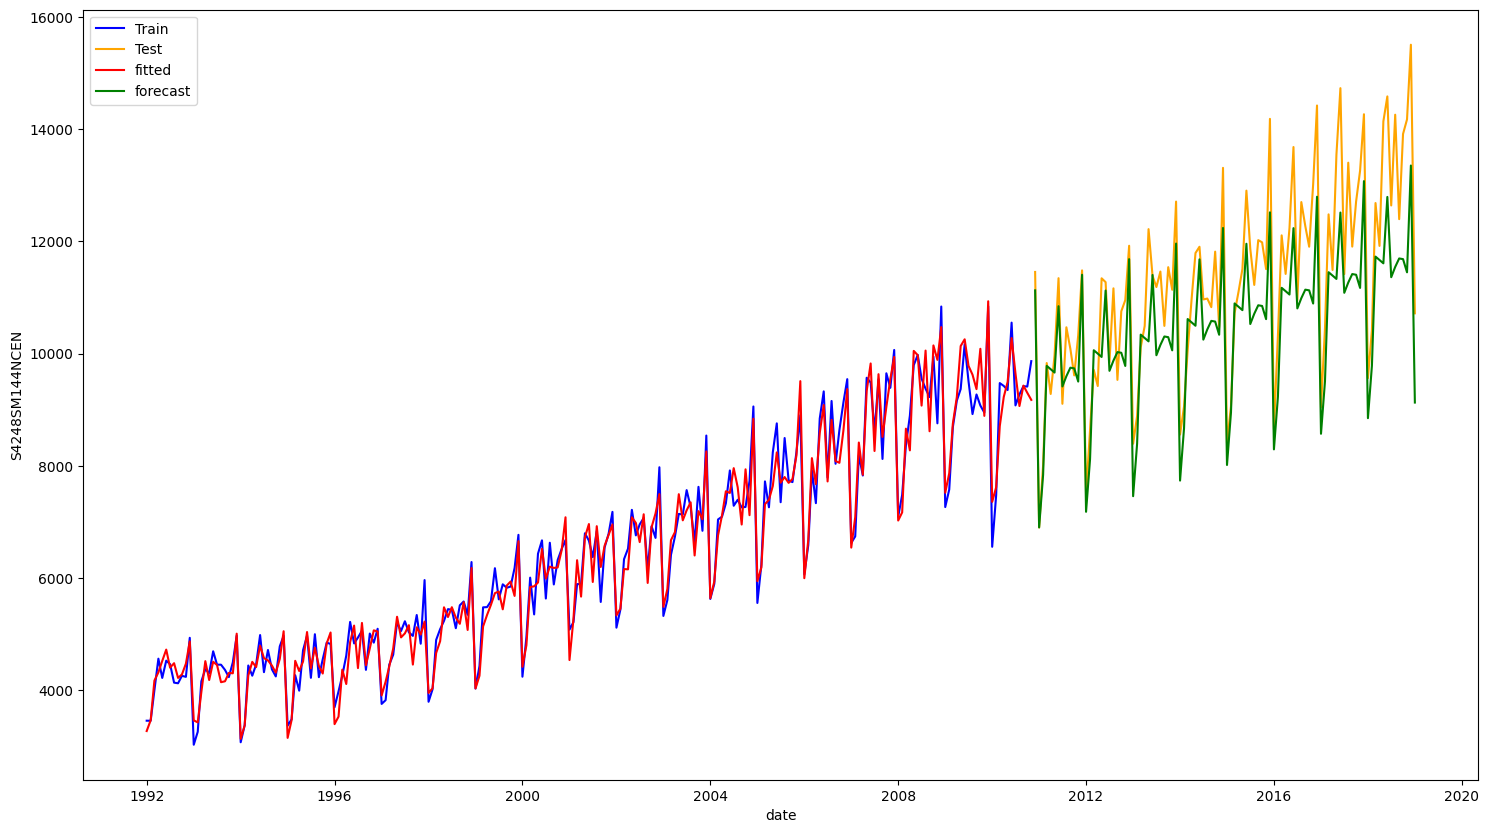

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(train_df['S4248SM144NCEN'],label='Train',color='blue')
plt.plot(test_df['S4248SM144NCEN'], label = 'Test',color='orange')
plt.plot(fitted_model.fittedvalues , label='fitted',color='red')
plt.plot(test_predictions , label ='forecast',color='green')
plt.xlabel('date')
plt.ylabel('S4248SM144NCEN')
plt.legend()
plt.show()

##Calculating Mean Absolute Percentage Error:

In [ ]:
mape_train = mean_absolute_percentage_error(train_df['S4248SM144NCEN'], fitted_model.fittedvalues)
print('MAPE for Train Data:', mape_train)

MAPE for Train Data: 0.03939709650831743


In [ ]:
mape_train = mean_absolute_percentage_error(test_df['S4248SM144NCEN'],test_predictions)
print('MAPE for Train Data:', mape_train)

MAPE for Train Data: 0.07323658097740739


#Augmented Dickey–Fuller (ADF) Test:

Null Hypothesis (HO): Series is non-stationary, or series has a unit root.

Alternate Hypothesis(HA): Series is stationary, or series has no unit root.

Reject NULL if p < 0.05

In [ ]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(df['S4248SM144NCEN'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   2.037405
p-value                          0.998720
#Lags Used                      14.000000
Number of Observations Used    310.000000
Critical Value (1%)             -3.451622
Critical Value (5%)             -2.870909
Critical Value (10%)            -2.571762
dtype: float64


The p-value is greater than 0.05 hence the series is NOT stationary.

# Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test:

Null Hypothesis (HO): Series is trend stationary or series has no unit root.

Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.

Reject NULL if p < 0.05

In [ ]:
from statsmodels.tsa.stattools import kpss
kp = kpss(df['S4248SM144NCEN'])
p = kp[1]

print("p-value for KPSS test (untransformed) = ", p)


p-value for KPSS test (untransformed) =  0.01


<ipython-input-27-90fc58ba4992>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kp = kpss(df['S4248SM144NCEN'])


The p-value is less than 0.05, which means that the alternate hypothesis holds true i.e. the series is NOT STATIONARY.

#Plotting Autocorrelation function (ACF) and Partial Autocorrelation Function (PACF) Graphs:

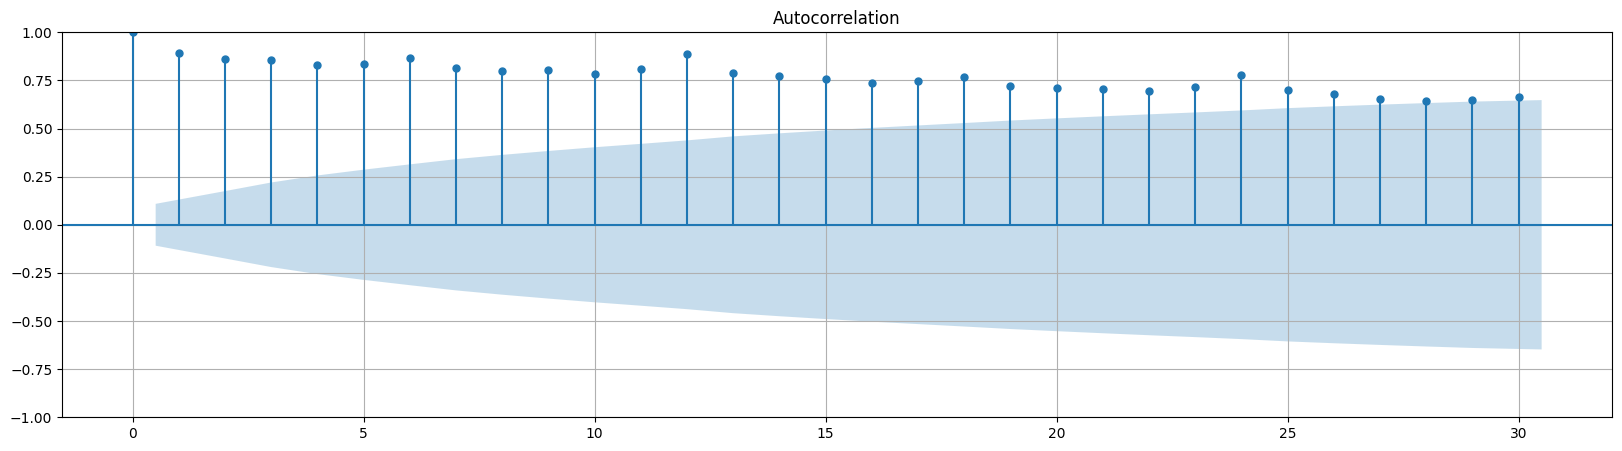

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(df['S4248SM144NCEN'] , ax=plt.gca(), lags =30 )
plt.show()

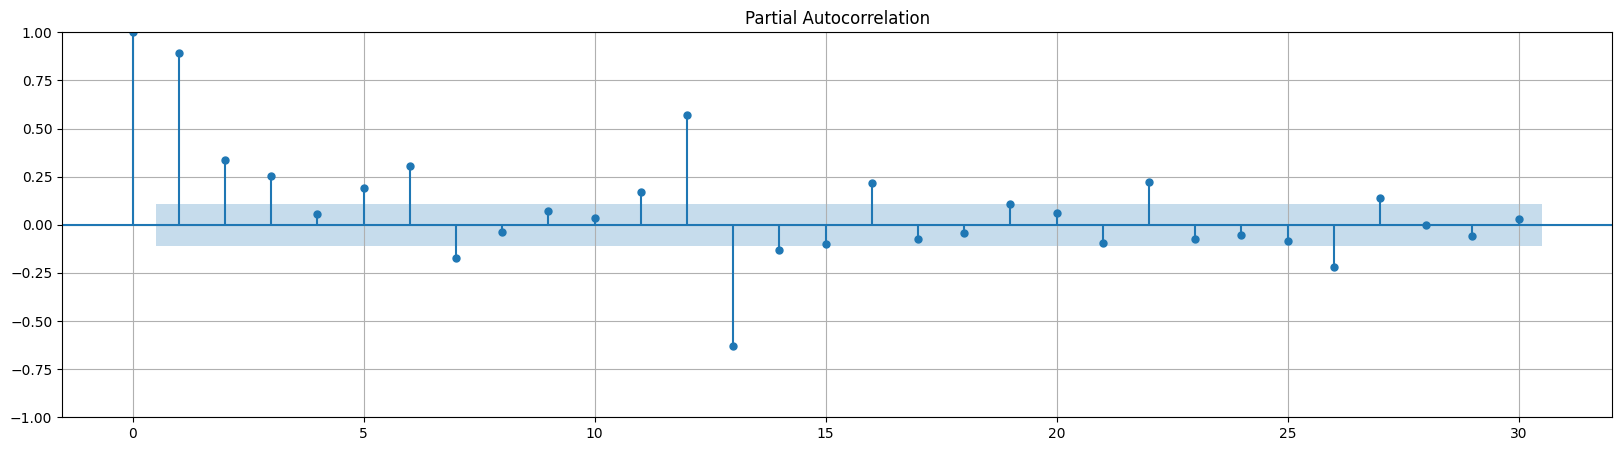

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_pacf(df['S4248SM144NCEN'] , ax=plt.gca(), lags =30 )
plt.show()

ACF SHOWS THAT DATA IS NOT STATIONARY

#Differencing the Data to make it Stationary:

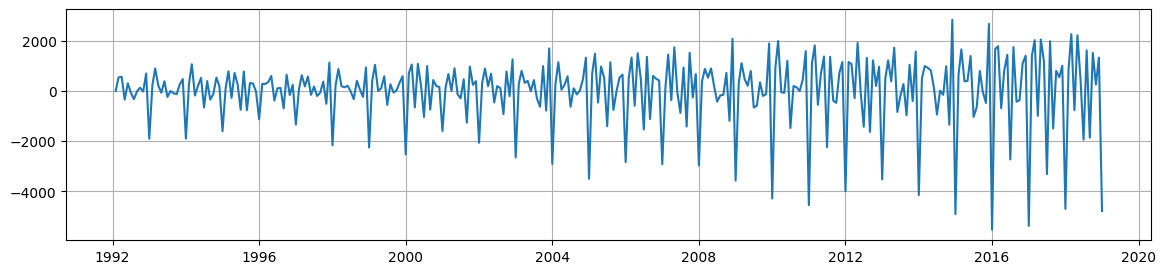

In [ ]:
diff = df['S4248SM144NCEN'].diff().dropna()     # TRYING TO MAKE DATA TREND STATIONARY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff)
plt.show()

In [ ]:
diff.head()

DATE
1992-02-01     -1.0
1992-03-01    544.0
1992-04-01    562.0
1992-05-01   -343.0
1992-06-01    308.0
Name: S4248SM144NCEN, dtype: float64

Seasonal Differencing

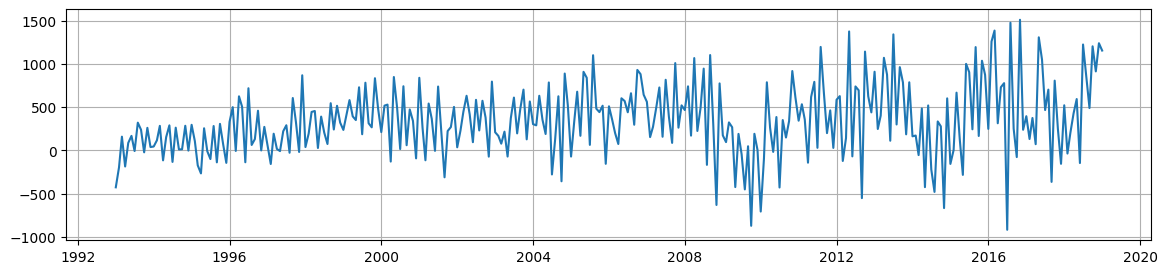

In [ ]:
sdiff = df['S4248SM144NCEN'].diff(periods = 12).dropna()          # TRYING TO REMOVE SEASONALITY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(sdiff)
plt.show()

In [ ]:
sdiff

DATE
1993-01-01    -428.0
1993-02-01    -197.0
1993-03-01     158.0
1993-04-01    -187.0
1993-05-01      86.0
               ...  
2018-09-01     489.0
2018-10-01    1203.0
2018-11-01     913.0
2018-12-01    1239.0
2019-01-01    1154.0
Name: S4248SM144NCEN, Length: 313, dtype: float64

##ADF and KPSS test to check the Stationarity:

In [ ]:
adf = adfuller(sdiff)
p = adf[1]

print("p-value for ADF test (seasonally differenced) = ", p)

p-value for ADF test (seasonally differenced) =  0.013210159306746884


Since the p-value is less than 0.05, we reject the null hypothesis and claim that the series is stationary as per ADF test.

In [ ]:
kp = kpss(sdiff)
p = kp[1]

print("p-value for KPSS test (seasonally differenced) = ", p)

p-value for KPSS test (seasonally differenced) =  0.01


<ipython-input-35-15321811aaf0>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kp = kpss(sdiff)


Since the p-value is less than 0.05, we reject the null hypothesis and claim that the series is NOT stationary as per KPSS test.

Seasonal and non-seasonal differencing

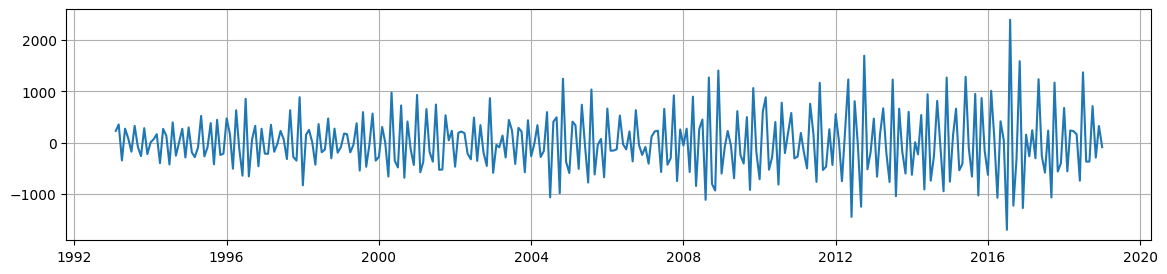

In [ ]:
sdiff = df['S4248SM144NCEN'].diff(periods = 12).dropna()  # seasonal differencing
sddiff = sdiff.diff().dropna()                          # non-seasonal differencing  # 1ST ORDER DIFFERENCING
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(sddiff)

plt.show()

In [ ]:
sddiff

DATE
1993-02-01    231.0
1993-03-01    355.0
1993-04-01   -345.0
1993-05-01    273.0
1993-06-01     81.0
              ...  
2018-09-01   -366.0
2018-10-01    714.0
2018-11-01   -290.0
2018-12-01    326.0
2019-01-01    -85.0
Name: S4248SM144NCEN, Length: 312, dtype: float64

In [ ]:
print("Results of Dickey-Fuller Test:")
dftest = adfuller(sddiff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.805335e+00
p-value                        2.184072e-09
#Lags Used                     1.300000e+01
Number of Observations Used    2.980000e+02
Critical Value (1%)           -3.452486e+00
Critical Value (5%)           -2.871288e+00
Critical Value (10%)          -2.571964e+00
dtype: float64


Since the p-value is less than 0.05, we reject the null hypothesis and claim that the series is stationary as per ADF test.

In [ ]:
from statsmodels.tsa.stattools import kpss
kp = kpss(sddiff)
p = kp[1]

print("p-value for KPSS test (untransformed) = ", p)

p-value for KPSS test (untransformed) =  0.1


<ipython-input-39-282cfca624c0>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kp = kpss(sddiff)


Since the p-value is greater than 0.05, we fail to reject the null hypothesis and claim that the series is stationary as per KPSS test.
We have attained the condition for seasonality through both ADF and KPSS test therefore we can move forward with fitting the model.



ACF and PACF plots

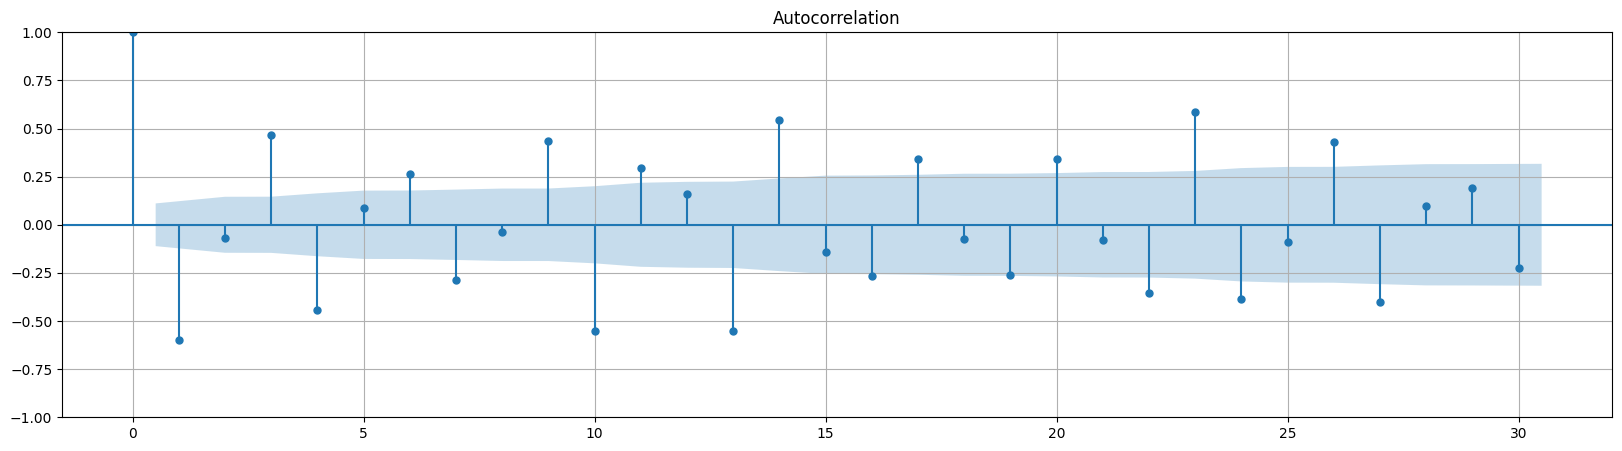

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(sddiff , ax=plt.gca(), lags = 30)
plt.show()

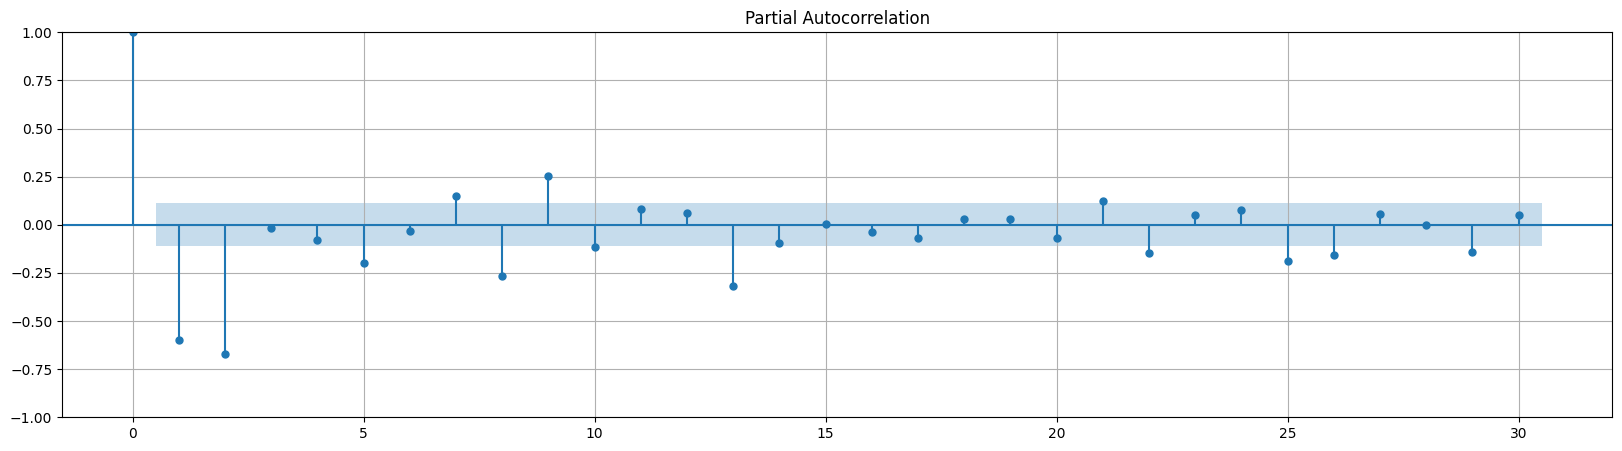

In [ ]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_pacf(sddiff , ax=plt.gca(), lags = 30)
plt.show()

#Fitting the Models:


In [ ]:
data_length = len(sddiff)
print("Length of time series data:", data_length)


Length of time series data: 312


### Splitting into training and testing sets

In [ ]:
# Calculate the split index dynamically based on a split ratio
split_ratio = 0.7  # 70% for training, 30% for testing
split = int(data_length * split_ratio)

# Splitting into training and testing sets
trainDiff = sddiff[:split]
testDiff = sddiff[split:]

print("Shape of trainDiff:", trainDiff.shape)
print("Shape of testDiff:", testDiff.shape)


Shape of trainDiff: (218,)
Shape of testDiff: (94,)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(trainDiff, order=(3, 0, 0)) #Fitting AR Model
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const         3.600237
ar.L1        -1.008677
ar.L2        -0.704863
ar.L3        -0.033301
sigma2    82049.306182
dtype: float64


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         S4248SM144NCEN   No. Observations:                  218
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1543.029
Date:                Fri, 05 Apr 2024   AIC                           3096.058
Time:                        03:43:36   BIC                           3112.981
Sample:                    02-01-1993   HQIC                          3102.894
                         - 03-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6002      7.269      0.495      0.620     -10.646      17.846
ar.L1         -1.0087      0.061    -16.650      0.000      -1.127      -0.890
ar.L2         -0.7049      0.073     -9.708      0.000      -0.847      -0.563
ar.L3         -0.0333      0.060     -0.556      0.578      -0.151       0.084
sigma2      8.205e+04   7458.486     11.001      0.000    6.74e+04    9.67e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.97   Prob(JB):                         0.37
Heteroskedasticity (H):               3.84   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
y_hat_ar = sddiff.copy()
y_hat_ar['ar_forecast_diff'] = model_fit.predict(sddiff.index.min(), sddiff.index.max())
y_hat_ar['ar_forecast'] = y_hat_ar['ar_forecast_diff'].cumsum()

In [ ]:
y_hat_ar['ar_forecast']

1993-02-01       3.600237
1993-03-01    -126.939109
1993-04-01    -622.740714
1993-05-01    -522.776887
1993-06-01    -556.900190
                 ...     
2018-09-01    1101.391994
2018-10-01    1104.992231
2018-11-01    1108.592468
2018-12-01    1112.192706
2019-01-01    1115.792943
Freq: MS, Name: predicted_mean, Length: 312, dtype: float64

###Calculating Mean Absolute Percentage Error(Mape) and Root Mean Square Error(Rmse):

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['S4248SM144NCEN'], y_hat_ar['ar_forecast'][test_df.index.min():])).round(2)
mape = np.round(mean_absolute_percentage_error(test_df['S4248SM144NCEN'], y_hat_ar['ar_forecast'][test_df.index.min():]),2)

results = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive (AR) method,10491.9,0.92


###Auto-ARIMA Model

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
# help(auto_arima) Get info on parameters

# Turn off warnings that can be distracting and of no concern
import warnings
warnings.filterwarnings('ignore')


# Trace shows the 1st couple ARIMA models it tried to fit
step_fit = auto_arima(df, m=12, trace=True)

# Returns AIC and BIC which estimate the quality of the models
# Then summary provides the best performing model
step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=4514.024, Time=3.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4868.181, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4731.674, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4629.449, Time=1.46 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=4527.109, Time=3.70 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=4539.016, Time=2.16 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=4499.168, Time=18.33 sec
 ARIMA(2,1,2)(2,1,0)[12]             : AIC=4523.762, Time=7.35 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=inf, Time=19.65 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=4508.118, Time=8.13 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=4526.711, Time=10.86 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=4504.012, Time=6.20 sec
 ARIMA(3,1,2)(2,1,1)[12]             : AIC=4491.408, Time=9.64 sec
 ARIMA(3,1,2)(1,1,1)[12]             : AIC=4506.197, Time=4.26 sec
 ARIMA(3,1,2)(2,1,0)[

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  325
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2212.064
Date:                            Fri, 05 Apr 2024   AIC                           4444.129
Time:                                    03:47:53   BIC                           4481.559
Sample:                                01-01-1992   HQIC                          4459.089
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0872      0.217     -0.403      0.687      -0.512       0.337
ar.L2          0.0975      0.088      1.112      0.266      -0.074       0.269
ar.L3          0.3204      0.069      4.619      0.000       0.184       0.456
ma.L1         -0.7463      0.224     -3.328      0.001      -1.186      -0.307
ma.L2         -0.1503      0.183     -0.822      0.411      -0.509       0.208
ar.S.L12       0.8702      0.068     12.800      0.000       0.737       1.003
ar.S.L24      -0.8241      0.059    -13.910      0.000      -0.940      -0.708
ma.S.L12      -1.1496      0.100    -11.524      0.000      -1.345      -0.954
ma.S.L24       0.6661      0.096      6.939      0.000       0.478       0.854
sigma2      8.358e+04   6863.278     12.178      0.000    7.01e+04     9.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                10.28
Prob(Q):                              0.67   Prob(JB):                         0.01
Heteroskedasticity (H):               4.23   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model= ARIMA(sddiff, order=(3, 1, 2))
 model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         S4248SM144NCEN   No. Observations:                  312
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2262.981
Date:                Fri, 05 Apr 2024   AIC                           4537.963
Time:                        03:59:33   BIC                           4560.401
Sample:                    02-01-1993   HQIC                          4546.932
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8985      0.055    -34.651      0.000      -2.006      -1.791
ar.L2         -1.5544      0.077    -20.177      0.000      -1.705      -1.403
ar.L3         -0.5753      0.050    -11.612      0.000      -0.672      -0.478
ma.L1         -0.0516      0.669     -0.077      0.939      -1.363       1.260
ma.L2         -0.9480      0.617     -1.536      0.124      -2.157       0.261
sigma2      1.192e+05   7.92e+04      1.506      0.132    -3.6e+04    2.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                11.14
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
train_df.index.min()

Timestamp('1992-01-01 00:00:00')

In [ ]:
# Generate forecasts
dfPred = sddiff.copy()
dfPred['forecast'] = model_fit.predict(sddiff.index.min(), sddiff.index.max())
dfPred['forecast2'] = dfPred['forecast'].cumsum()

forecast_values= dfPred['forecast2']
# Print or use the forecast values as needed
print("Forecasted values:", dfPred['forecast2'])

Forecasted values: 1993-02-01       0.000000
1993-03-01     150.212703
1993-04-01     325.370944
1993-05-01     736.586144
1993-06-01     931.701050
                 ...     
2018-09-01    4369.431500
2018-10-01    5058.993506
2018-11-01    4524.945600
2018-12-01    4425.559254
2019-01-01    4270.093866
Freq: MS, Name: predicted_mean, Length: 312, dtype: float64


###Calculate mape and rmse

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['S4248SM144NCEN'], dfPred['forecast2'][test_df.index.min():])).round(2)
mape = np.round(mean_absolute_percentage_error(test_df['S4248SM144NCEN'], dfPred['forecast2'][test_df.index.min():]),2)


In [ ]:
rmse

6543.55

In [ ]:
mape

0.55

In [ ]:
test_df.shape

(98, 1)

In [ ]:
len(forecast_values)

98

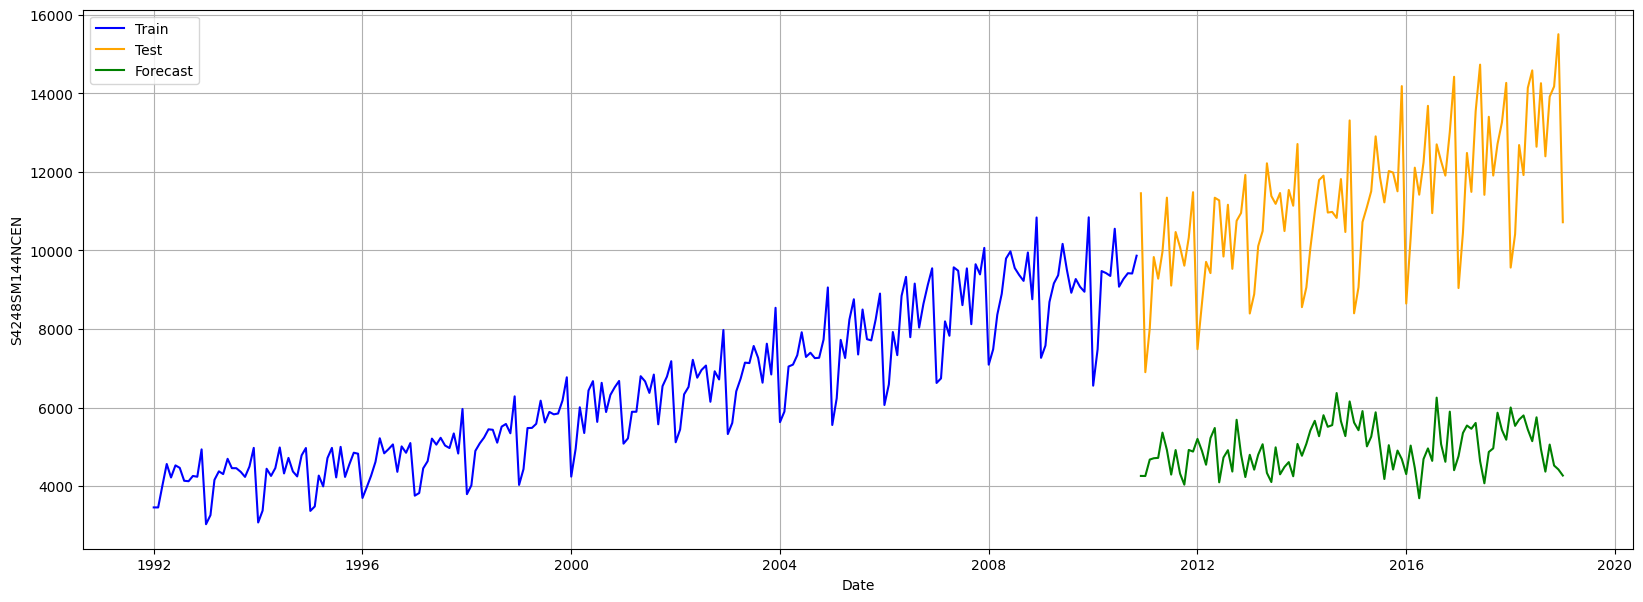

In [ ]:
plt.figure(figsize=(20, 7))
plt.grid()
plt.plot(train_df['S4248SM144NCEN'], label='Train', color='blue')
plt.plot(test_df['S4248SM144NCEN'], label='Test', color='orange')
plt.plot(dfPred['forecast2'][test_df.index.min():], label='Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('S4248SM144NCEN')
plt.legend()
plt.show()


###SARIMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(train_df['S4248SM144NCEN'], order=(3, 1, 2), seasonal_order=(2,1,2, 12))
model_sarima_fit = model_sarima.fit()

In [ ]:
print(model_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     S4248SM144NCEN   No. Observations:                  227
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1483.750
Date:                            Fri, 05 Apr 2024   AIC                           2987.500
Time:                                    03:48:07   BIC                           3021.160
Sample:                                01-01-1992   HQIC                          3001.101
                                     - 11-01-2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9447      0.304     -3.112      0.002      -1.540      -0.350
ar.L2         -0.3767      0.276   

In [ ]:
forecast = model_sarima_fit.forecast(len(test_df['S4248SM144NCEN']))
forecast_further = model_sarima_fit.forecast(len(test_df['S4248SM144NCEN']) + 40)
forecast_further = forecast_further[test_df.index.max():]

In [ ]:
forecast_further

2019-01-01     9597.983220
2019-02-01    10142.207580
2019-03-01    11549.463723
2019-04-01    11827.689652
2019-05-01    12348.058953
2019-06-01    12922.662693
2019-07-01    12080.207561
2019-08-01    11994.657738
2019-09-01    11777.787746
2019-10-01    12388.340917
2019-11-01    11997.592328
2019-12-01    13440.914670
2020-01-01     9691.702610
2020-02-01    10329.213517
2020-03-01    11836.948462
2020-04-01    12188.771456
2020-05-01    12306.074114
2020-06-01    13094.066249
2020-07-01    12247.584335
2020-08-01    11954.271775
2020-09-01    12044.409486
2020-10-01    12353.155320
2020-11-01    12132.972409
2020-12-01    13667.220574
2021-01-01     9709.157804
2021-02-01    10483.059561
2021-03-01    12217.329249
2021-04-01    12373.214797
2021-05-01    12412.672175
2021-06-01    13398.284317
2021-07-01    12234.388125
2021-08-01    12200.750152
2021-09-01    12301.173281
2021-10-01    12468.702290
2021-11-01    12578.629487
2021-12-01    13818.188454
2022-01-01     9909.653808
2

In [ ]:
forecast

2010-12-01    10829.281151
2011-01-01     6943.262710
2011-02-01     7802.225848
2011-03-01     9773.869804
2011-04-01     9441.851796
                  ...     
2018-09-01    11506.004327
2018-10-01    12250.276282
2018-11-01    12064.759127
2018-12-01    13089.468518
2019-01-01     9597.983220
Freq: MS, Name: predicted_mean, Length: 98, dtype: float64

###Calculate mape and rmse

In [ ]:
rmse = np.sqrt(mean_squared_error(test_df['S4248SM144NCEN'], forecast)).round(2)
mape = np.round(mean_absolute_percentage_error(test_df['S4248SM144NCEN'], forecast),2)

# Print results
print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 959.56
MAPE: 0.06


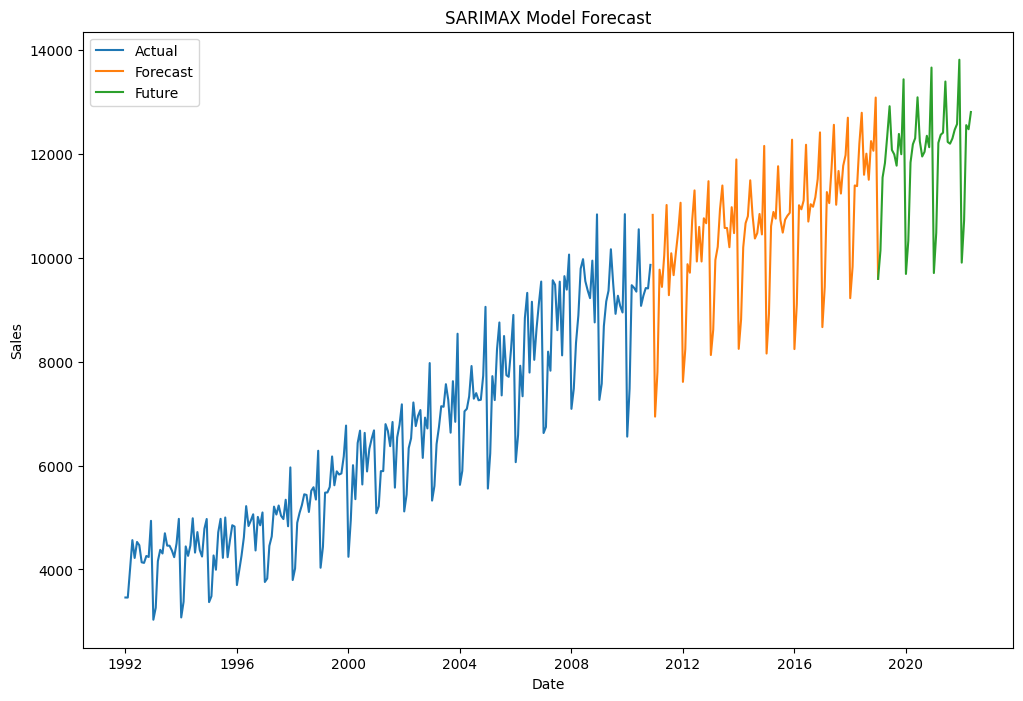

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(train_df['S4248SM144NCEN'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.plot(forecast_further, label='Future')

plt.title('SARIMAX Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.show()


#Conclusion

##Our best model came to be SARIMA with

RMSE: 959.56

MAPE: 0.06